In [109]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # Set the style of the plots that will be created
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjust the configuration of the plots that will be created


In [110]:
movies_df = pd.read_csv("movies.csv") # Load the dataset
movies_df.head(10) # Display the first 10 rows of the dataset to understand its structure

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [111]:
for col in movies_df.columns:
    missing_pct = np.mean(movies_df[col].isnull()) # Check if there are missing values in the dataset
    print('{} - {}%'.format(col, missing_pct)) # Display the percentage of missing values in each column

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [112]:
movies_df = movies_df.dropna() # Remove rows with missing values

In [113]:
movies_df.dtypes # Display the data types of each column in the dataset

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [114]:
movies_df['budget'] = movies_df['budget'].astype('int64') # Convert the 'budget' column to integer data type
movies_df['gross'] = movies_df['gross'].astype('int64') # Convert the 'gross' column to integer data type

In [115]:
movies_df.head(10) # check if the columns have been converted to the correct data type

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [116]:
import re
movies_df['country_origin'] = movies_df['released'].str.extract(r'\((.*)\)').astype(object).replace(np.nan, 'None') # Extract the country of origin from the 'released' column

In [117]:
movies_df['release_date'] = movies_df['released'].str.extract(r'(.*)\(').astype(object).replace(np.nan, 'None') # Extract the release date from the 'released' column

In [118]:
movies_df # Display the dataset to check if the columns have been created correctly

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_origin,release_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,"July 25, 1980"
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,United States,"May 9, 1980"
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,United States,"June 20, 1980"
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,United States,"December 19, 1980"
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,United States,"June 19, 1981"
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,United States,"May 16, 1980"


In [119]:
for col in movies_df.columns:
    missing_pct = np.mean(movies_df[col].isnull()) # Check if there are missing values in the dataset
    print('{} - {}%'.format(col, missing_pct)) # Display the percentage of missing values in each column

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
country_origin - 0.0%
release_date - 0.0%


In [120]:
movies_df = movies_df.drop(['released'], axis=1) # Remove the 'released' column
movies_df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,country_origin,release_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,"July 25, 1980"
5,Friday the 13th,R,Horror,1980,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,United States,"May 9, 1980"
6,The Blues Brothers,R,Action,1980,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,United States,"June 20, 1980"
7,Raging Bull,R,Biography,1980,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,United States,"December 19, 1980"
8,Superman II,PG,Action,1980,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,United States,"June 19, 1981"
9,The Long Riders,R,Biography,1980,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,United States,"May 16, 1980"


In [121]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce') # Convert the 'release_date' column to datetime data type
movies_df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,country_origin,release_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980-06-20
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980-07-02
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980-07-25
5,Friday the 13th,R,Horror,1980,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,United States,1980-05-09
6,The Blues Brothers,R,Action,1980,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,United States,1980-06-20
7,Raging Bull,R,Biography,1980,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,United States,1980-12-19
8,Superman II,PG,Action,1980,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,United States,1981-06-19
9,The Long Riders,R,Biography,1980,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,United States,1980-05-16


There are some errors in the year column where the year written is not the same as the year recorded in the relese_date column.
Consequently the year column will be dropped and a new column named year_origin will be created and it will include the year extracted from the release_date column to ensure the data's consiestency.

In [122]:
movies_df['year_origin'] = movies_df['release_date'].astype(str).str[:4] # Extract the year (first 4 char) from the 'release_date' column
movies_df.drop(['year'], axis=1) # Remove the 'release_date' column

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,country_origin,release_date,year_origin
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980-06-20,1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980-07-02,1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980-07-25,1980
5,Friday the 13th,R,Horror,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,United States,1980-05-09,1980
6,The Blues Brothers,R,Action,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,United States,1980-06-20,1980
7,Raging Bull,R,Biography,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,United States,1980-12-19,1980
8,Superman II,PG,Action,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,United States,1981-06-19,1981
9,The Long Riders,R,Biography,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,United States,1980-05-16,1980


In [123]:
#pd.set_option('display.max_rows', None) # Display all rows in the dataset
pd.set_option('display.max_rows', 20)
movies_df.sort_values(by=['gross'], ascending=False) # Sort the dataset by the 'gross' column in descending order

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,country_origin,release_date,year_origin
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018-04-27,2018
7480,The Lion King,PG,Animation,2019,6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,United States,2019-07-19,2019
6653,Jurassic World,PG-13,Action,2015,7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,United States,2015-06-12,2015
6043,The Avengers,PG-13,Action,2012,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,United States,2012-05-04,2012
6646,Furious 7,PG-13,Action,2015,7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,United States,2015-04-03,2015
7494,Frozen II,PG,Animation,2019,6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,United States,2019-11-22,2019


In [124]:
movies_df.drop_duplicates() # Remove duplicate rows in the dataset

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,country_origin,release_date,year_origin
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980-07-25,1980
5,Friday the 13th,R,Horror,1980,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,United States,1980-05-09,1980
6,The Blues Brothers,R,Action,1980,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,United States,1980-06-20,1980
7,Raging Bull,R,Biography,1980,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,United States,1980-12-19,1980
8,Superman II,PG,Action,1980,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,United States,1981-06-19,1981
9,The Long Riders,R,Biography,1980,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,United States,1980-05-16,1980


In [125]:
movies_df['company'].drop_duplicates().sort_values(ascending= False) # to check the unique values in the 'company' column

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
3776                         double A Films
3330            Zucker Brothers Productions
146                        Zoetrope Studios
2213                     Zeta Entertainment
3698                Zentropa Entertainments
                       ...                 
7489                      2.0 Entertainment
4151                           2 Loop Films
6517       1984 Private Defense Contractors
7109                             1978 Films
4412                       19 Entertainment
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

Since we are analyzing the correlation between diffrent factors and gross, I will choose the things that I think could affect the gross of the movie.
Hypothesis:
The more the budget increase the more the accumlated gross will be. (high correlation)
The company's name and popularity may affect the gross. (high correlation)


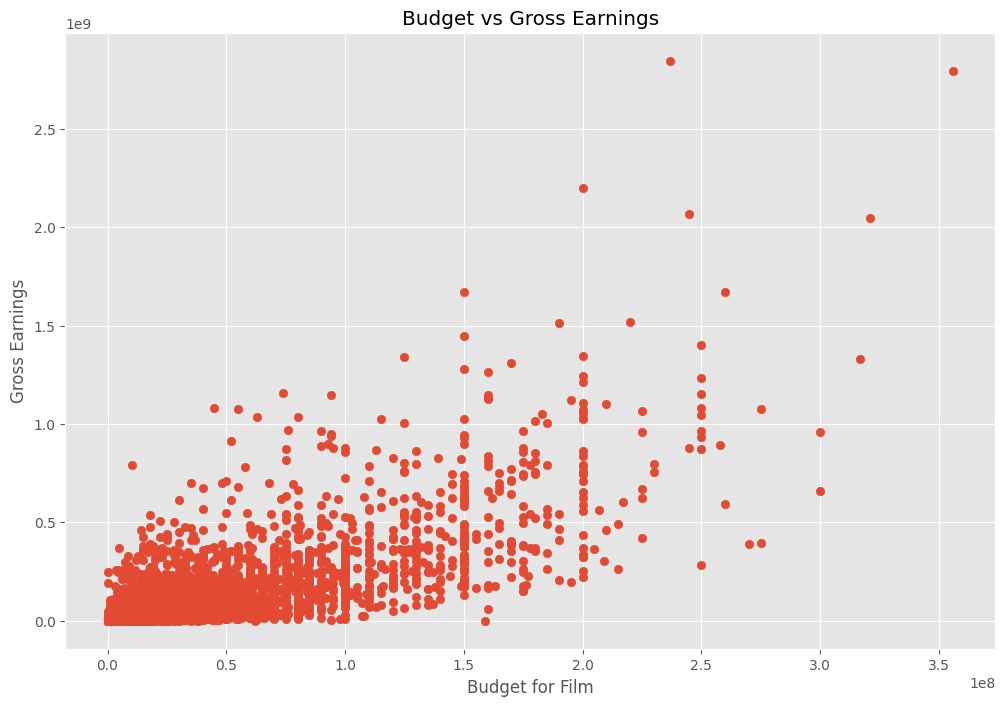

In [126]:
# Scatter plot of 'budget' vs 'gross' to check the relationship between the two variables
plt.scatter(x=movies_df['budget'], y=movies_df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

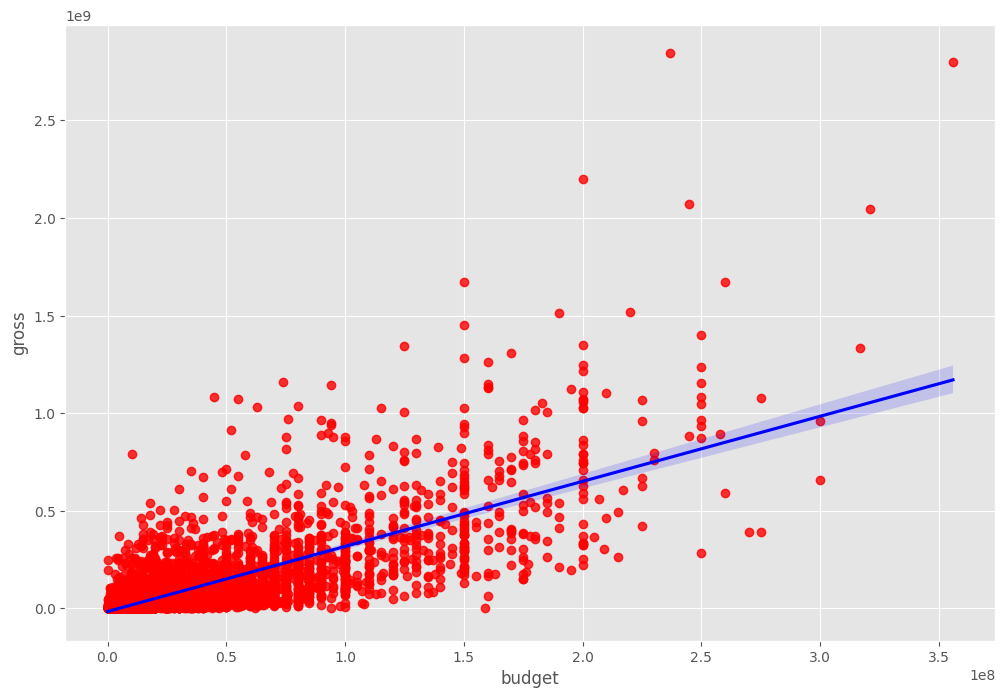

In [127]:
# Plot the regression line between budget and gross to check the correlation between the two variables
sns.regplot(x='budget', y='gross', data=movies_df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [128]:
# Select only the numerical columns
numerical_df = movies_df.select_dtypes(include=[np.number])
# Calculate the correlation between the numerical variables in the dataset
numerical_df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


There is a positive correlation between the budget and the gross.
The correlation coffiecient is equal to 0.740247 which shows a high positive correlation.
The correlation test was done with method pearson, te results will differ if Kendall or spearman methods were used.

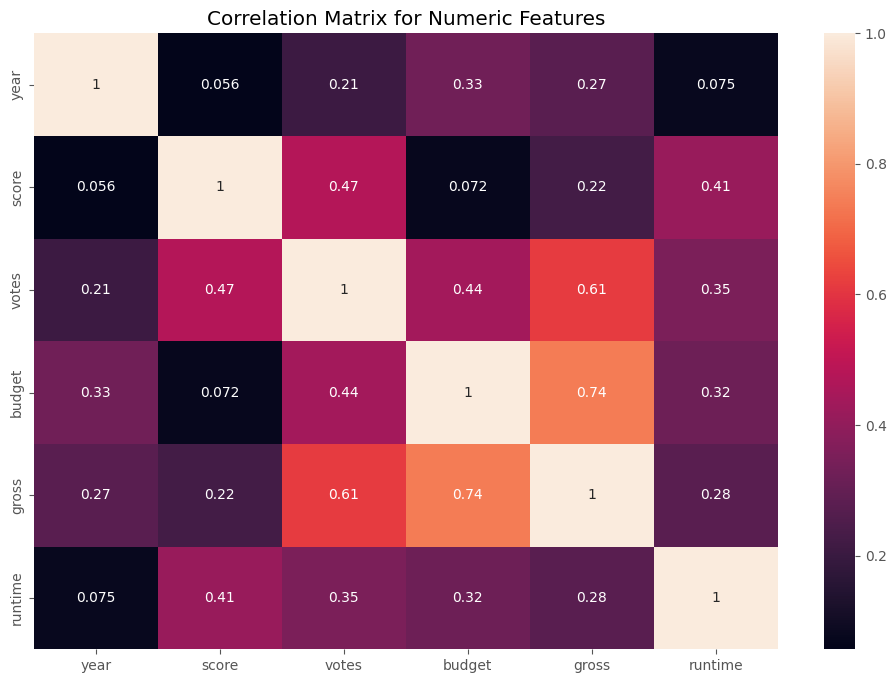

In [129]:
corr_matrix = numerical_df.corr(method='pearson') # Calculate the correlation between the numerical variables in the dataset
sns.heatmap(corr_matrix, annot=True) # Plot the heatmap of the correlation matrix
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [130]:
movies_df_numerized = movies_df.copy() # Create a copy of the dataset

for col_name in movies_df_numerized.columns:
    if(movies_df_numerized[col_name].dtype == 'object'):
        movies_df_numerized[col_name] = movies_df_numerized[col_name].astype('category') # Convert the object data type to category data type
        movies_df_numerized[col_name] = movies_df_numerized[col_name].cat.codes # Convert the categorical data to numerical data

movies_df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,country_origin,release_date,year_origin
0,4692,6,6,1980,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,47,1980-06-13,0
1,3929,6,1,1980,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,47,1980-07-02,0
2,3641,4,0,1980,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,47,1980-06-20,0
3,204,4,4,1980,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,47,1980-07-02,0
4,732,6,4,1980,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,47,1980-07-25,0
5,1509,6,9,1980,6.4,123000.0,1758,3081,155,47,550000,39754601,1108,95.0,47,1980-05-09,0
6,3930,6,0,1980,7.9,188000.0,974,576,860,47,27000000,115229890,1397,133.0,47,1980-06-20,0
7,3122,6,3,1980,8.2,330000.0,1269,1257,1469,47,18000000,23402427,390,129.0,47,1980-12-19,0
8,3732,4,0,1980,6.8,101000.0,1606,1402,595,47,54000000,108185706,548,127.0,47,1981-06-19,1
9,4401,6,3,1980,7.0,10000.0,2011,280,402,47,10000000,15795189,1391,100.0,47,1980-05-16,0


In [131]:
movies_df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,country_origin,release_date,year_origin
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980-07-25,1980
5,Friday the 13th,R,Horror,1980,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,United States,1980-05-09,1980
6,The Blues Brothers,R,Action,1980,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,United States,1980-06-20,1980
7,Raging Bull,R,Biography,1980,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,United States,1980-12-19,1980
8,Superman II,PG,Action,1980,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,United States,1981-06-19,1981
9,The Long Riders,R,Biography,1980,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,United States,1980-05-16,1980


In [136]:
corr_matrix_all = movies_df_numerized.corr(method='pearson')
corr_pairs_all = corr_matrix_all.unstack() # Unstack the correlation matrix
sorted_pairs_all = corr_pairs_all.sort_values(kind="quicksort") # Sort the correlation pairs
print(sorted_pairs_all)

budget        genre          -0.368523
genre         budget         -0.368523
              gross          -0.244101
gross         genre          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
gross         rating         -0.181906
rating        gross          -0.181906
genre         votes          -0.135990
votes         genre          -0.135990
                                ...   
country       country         1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
release_date  release_date    1.000000
year_origin   year_origin     1.000000
Length: 289, dtype: float64


In [140]:
print(sorted_pairs_all[(sorted_pairs_all > 0.5) & (sorted_pairs_all < 1)]) # Display the correlation pairs with a correlation coefficient greater than 0.5

release_date  year            0.581274
year          release_date    0.581274
votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
year_origin   year            0.987770
year          year_origin     0.987770
dtype: float64


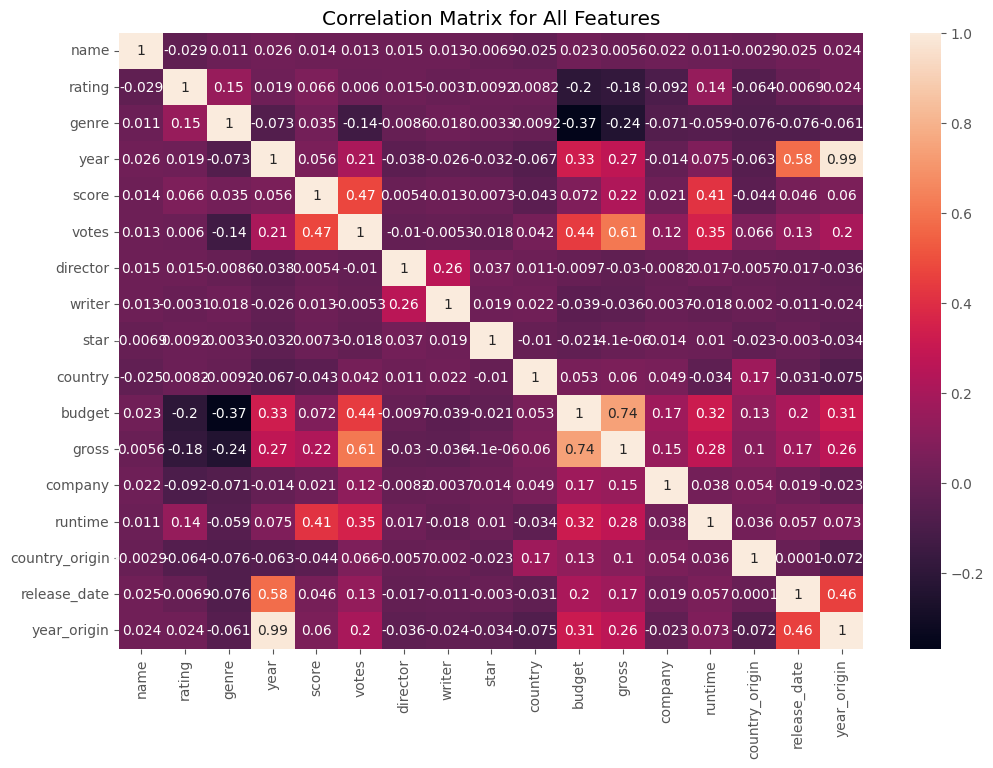

In [132]:
corr_matrix2 = movies_df_numerized.corr(method='pearson') # Calculate the correlation between the numerical variables in the dataset
sns.heatmap(corr_matrix2, annot=True) # Plot the heatmap of the correlation matrix
plt.title('Correlation Matrix for All Features')
plt.show()

It seems that gross is highly correlated with budget and votes while other variables seem to not affect the gross as much as the mentioned variables do.
So to sum up our hypothesis:
Gross and budget are highly postively correlated.
Gross and company are not highly correlated compared to the budget as the correlation coffectient is 0.15 which shows positive correlation but it is very small.